### Project 1 Computer Vision with CNN

The case study is from a dataset from Kaggle. 

Link to the Kaggle project site:

https://www.kaggle.com/c/plant-seedlings-classification (Links to an external site.)Links to an external site.

 

The dataset has to be downloaded from the above Kaggle web site.

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

 

 

The points distribution for this case is as follows:

Read the images and generate the train and test dataset (10 points)
2. Divide the data set into Train and validation data sets ( 10 points)
3. Initialize & build the model (20 points)
4. Optimize the model (15 points)
5. Predict the accuracy for both train and validation data (5 points)

In [1]:
# Import all libraries

In [2]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import GlobalAveragePooling2D
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
import os
from skimage import io
from skimage.transform import resize

In [4]:
print(os.getcwd())

C:\Users\msrikanta\OneDrive - VMware, Inc\MDS\Trainings\Great lakes\External Lab\7Jul19


In [5]:
PROJECT_ROOT_DIR = r"C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train"

In [6]:
# Sampling categories
CATEGORIES=["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"]

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Black-grass0050f38b3.png


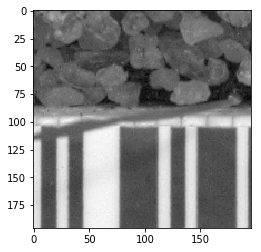

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Black-grass0183fdf68.png


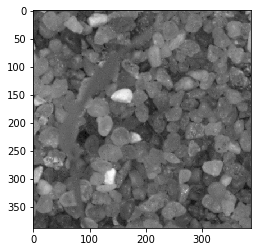

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Charlock022179d65.png


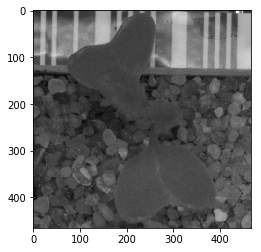

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Charlock02c95e601.png


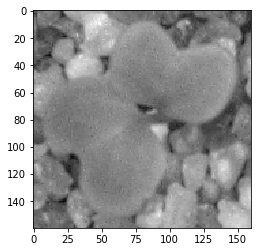

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Cleavers005b4a3e3.png


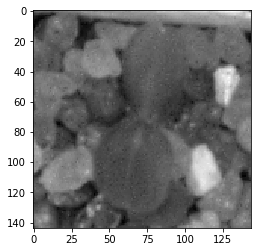

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Cleavers00aa8d5a4.png


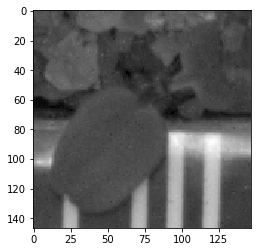

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Common Chickweed00b6eee9f.png


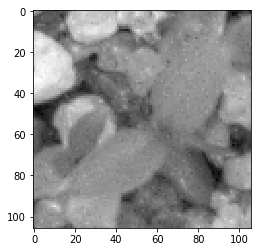

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Common Chickweed00ba5f88a.png


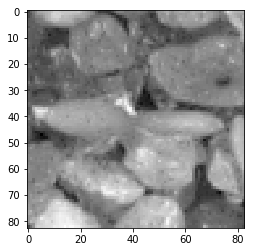

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Common wheat012db0f43.png


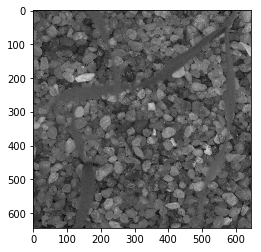

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Common wheat01a2ae45e.png


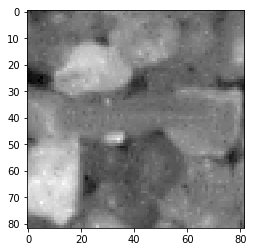

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Fat Hen00268e97d.png


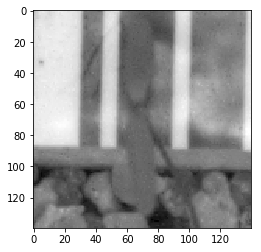

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Fat Hen008f1b92d.png


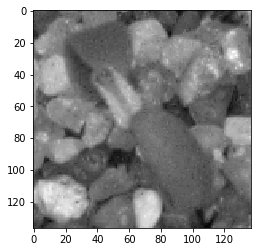

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Loose Silky-bent0012f11c4.png


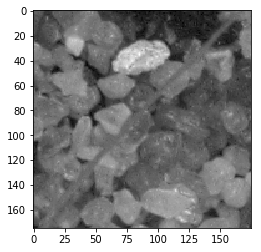

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Loose Silky-bent00442de98.png


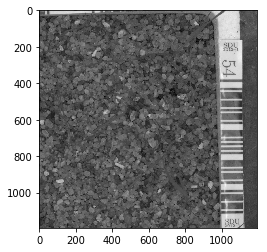

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Maize006196e1c.png


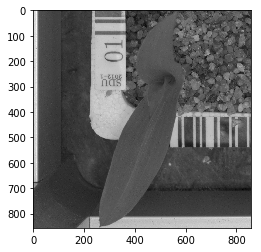

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Maize0086c28b2.png


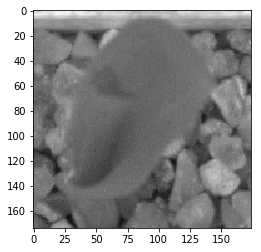

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Scentless Mayweed01358344b.png


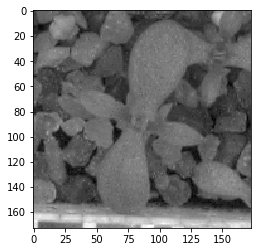

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Scentless Mayweed015215883.png


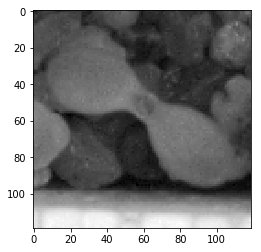

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Shepherds Purse006a4d00d.png


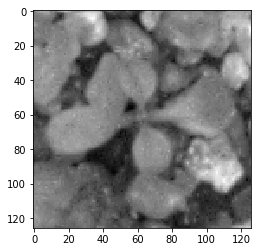

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Shepherds Purse00dd0d16a.png


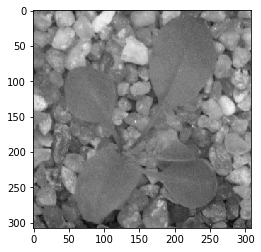

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Small-flowered Cranesbill003402ea0.png


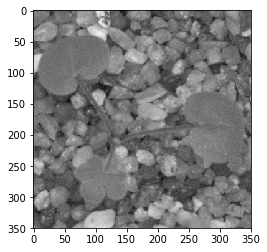

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Small-flowered Cranesbill00cc58829.png


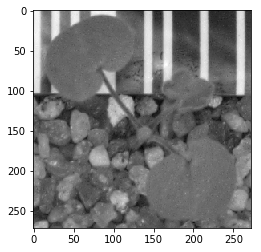

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Sugar beet0026b7a30.png


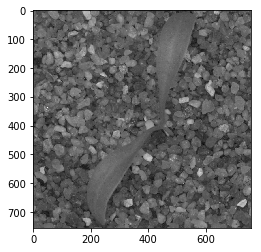

C:/Users/msrikanta/OneDrive - VMware, Inc/MDS/Trainings/Great lakes/External Lab/7Jul19/plant-seedlings-classification/train\Sugar beet00626e3be.png


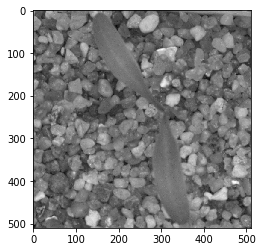

In [7]:
# read first 1-1 images from all categories
for category in CATEGORIES:
    path = os.path.join(PROJECT_ROOT_DIR,category)
#     print(path)
    i = 0
    for img in os.listdir(path):
        if(i < 2):
            i += 1
            print(path + img)
            img_array = io.imread(os.path.join(path,img),as_gray=True)
            plt.imshow(img_array,cmap="gray")
            plt.show()

In [8]:
# Create training dataset
training_data = []
img_size=50

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(PROJECT_ROOT_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = io.imread(os.path.join(path,img),as_gray=True)      
            new_array = resize(img_array, (img_size,img_size))
            training_data.append([new_array,class_num]) 

In [9]:
create_training_data()

C:\Users\msrikanta\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\msrikanta\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [10]:
len(training_data)

4750

In [11]:
X=[]
Y=[]

for feature, label in training_data:
    X.append(feature)
    Y.append(label)
# reimage the shape into 50*50 size
X = np.array(X).reshape(-1,img_size,img_size,1)

In [12]:
Y = np.array(Y)

In [13]:
X.shape

(4750, 50, 50, 1)

In [14]:
Y.shape

(4750,)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.30, random_state=7)

In [16]:
X_train.shape

(3325, 50, 50, 1)

In [17]:
#Initialize Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(BatchNormalization())
# 1st Dense Layers
model.add(Dense(500))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
#output layer
model.add(Dense(12))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
#Represent Training & validation samples suitable for tensorflow backend
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1).astype('float32') # The digit 1 signifies the images are in grayscale
X_val = X_val.reshape(X_val.shape[0], 50, 50, 1).astype('float32')

In [19]:
X_train.shape

(3325, 50, 50, 1)

In [20]:
X_val.shape

(1425, 50, 50, 1)

In [21]:
X_train/=255
X_val/=255    # standardize the data for train and test to be between 0 -1

In [22]:
#Encoding the output class label (One-Hot Encoding)
y_train = np_utils.to_categorical(y_train, 12)
y_val = np_utils.to_categorical(y_val, 12)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, batch_size=32, epochs=10, 
              validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 39s 12ms/step - loss: 2.4722 - acc: 0.1420 - val_loss: 2.5012 - val_acc: 0.0449
Epoch 2/10
3325/3325 [==============================] - 37s 11ms/step - loss: 2.4459 - acc: 0.1564 - val_loss: 2.6937 - val_acc: 0.1446
Epoch 3/10
3325/3325 [==============================] - 37s 11ms/step - loss: 2.4237 - acc: 0.1672 - val_loss: 2.7948 - val_acc: 0.1446
Epoch 4/10
3325/3325 [==============================] - 37s 11ms/step - loss: 2.4028 - acc: 0.1699 - val_loss: 3.7094 - val_acc: 0.1446
Epoch 5/10
3325/3325 [==============================] - 38s 11ms/step - loss: 2.3790 - acc: 0.1741 - val_loss: 6.7950 - val_acc: 0.1446
Epoch 6/10
3325/3325 [==============================] - 36s 11ms/step - loss: 2.3463 - acc: 0.1880 - val_loss: 8.8059 - val_acc: 0.1228
Epoch 7/10
3325/3325 [==============================] - 37s 11ms/step - loss: 2.3082 - a

Performance not good .. trying another optimizer

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, 
              validation_data=(X_val, y_val))

Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 42s 13ms/step - loss: 2.3287 - acc: 0.2021 - val_loss: 14.5459 - val_acc: 0.0975
Epoch 2/10
3325/3325 [==============================] - 38s 11ms/step - loss: 2.0781 - acc: 0.2962 - val_loss: 13.7880 - val_acc: 0.1446
Epoch 3/10
3325/3325 [==============================] - 38s 12ms/step - loss: 1.7585 - acc: 0.4153 - val_loss: 14.6590 - val_acc: 0.0905
Epoch 4/10
3325/3325 [==============================] - 39s 12ms/step - loss: 1.3467 - acc: 0.5471 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 5/10
3325/3325 [==============================] - 38s 12ms/step - loss: 0.9273 - acc: 0.6893 - val_loss: 15.2245 - val_acc: 0.0554
Epoch 6/10
3325/3325 [==============================] - 39s 12ms/step - loss: 0.6577 - acc: 0.7823 - val_loss: 14.6590 - val_acc: 0.0905
Epoch 7/10
3325/3325 [==============================] - 39s 12ms/step - loss: 0.4463 - acc: 0.8517 - val_loss: 13.7880 - val_acc: 

In [26]:
#Initialize Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(BatchNormalization())
# 1st Dense Layers
model.add(Dense(500))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
#output layer
model.add(Dense(12))
model.add(Activation('softmax'))

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_val, y_val))

Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 41s 12ms/step - loss: 2.2807 - acc: 0.2063 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 2/10
3325/3325 [==============================] - 38s 12ms/step - loss: 2.0348 - acc: 0.3053 - val_loss: 14.8513 - val_acc: 0.0786
Epoch 3/10
3325/3325 [==============================] - 40s 12ms/step - loss: 1.7182 - acc: 0.4171 - val_loss: 14.5459 - val_acc: 0.0975
Epoch 4/10
3325/3325 [==============================] - 40s 12ms/step - loss: 1.4750 - acc: 0.5113 - val_loss: 15.3942 - val_acc: 0.0449
Epoch 5/10
3325/3325 [==============================] - 38s 12ms/step - loss: 1.4710 - acc: 0.4977 - val_loss: 15.2425 - val_acc: 0.0470
Epoch 6/10
3325/3325 [==============================] - 38s 11ms/step - loss: 1.4894 - acc: 0.4827 - val_loss: 13.3469 - val_acc: 0.0470
Epoch 7/10
3325/3325 [==============================] - 38s 11ms/step - loss: 1.2817 - acc: 0.5636 - val_loss: 15.3603 - val_acc: 

Performance still not great for validation dataset

In [28]:
#Initialize Sequential model
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model1.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())
model1.add(BatchNormalization())
# 1st Dense Layers
model1.add(Dense(500))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Dense(1000))
model1.add(Activation('relu'))
# Dropout
model1.add(Dropout(0.25))
model1.add(Dense(1500))
model1.add(Activation('relu'))
#output layer
model1.add(Dense(12))
model1.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [30]:
batch_size = 64
epochs = 10

model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 35s 11ms/step - loss: 0.2771 - acc: 0.9166 - val_loss: 2.2855 - val_acc: 0.8574
Epoch 2/10
3325/3325 [==============================] - 31s 9ms/step - loss: 0.2683 - acc: 0.9165 - val_loss: 2.2855 - val_acc: 0.8574
Epoch 3/10
3325/3325 [==============================] - 28s 8ms/step - loss: 0.2649 - acc: 0.9164 - val_loss: 1.6675 - val_acc: 0.8412
Epoch 4/10
3325/3325 [==============================] - 32s 10ms/step - loss: 0.2639 - acc: 0.9165 - val_loss: 2.0934 - val_acc: 0.8496
Epoch 5/10
3325/3325 [==============================] - 31s 9ms/step - loss: 0.2618 - acc: 0.9167 - val_loss: 2.2855 - val_acc: 0.8574
Epoch 6/10
3325/3325 [==============================] - 29s 9ms/step - loss: 0.2607 - acc: 0.9164 - val_loss: 2.5461 - val_acc: 0.8412
Epoch 7/10
3325/3325 [==============================] - 29s 9ms/step - loss: 0.2616 - acc: 0.9167 - val_loss: 2.4670 - val_acc: 0.8412
Epoch

Performance significantly improved

In [31]:
#Evaluate the model on the train data
score_train = model1.evaluate(X_train, y_train)

#Accuracy on test data
print('Accuracy on the Train Images: ', score_train[1])

3325/3325 [==============================] - 12s 3ms/step
Accuracy on the Train Images:  0.8431579262511174


In [32]:
#Evaluate the model on the validation data
score_val = model1.evaluate(X_val, y_val)

#Accuracy on test data
print('Accuracy on the Test Images: ', score_val[1])

1425/1425 [==============================] - 5s 3ms/step
Accuracy on the Test Images:  0.8411696171760559
